# Employee Attrition

The data has been taken from IBM Employee HR Attrition Kaggle 
<br>The main Business problem that is being solved here is how can a system be created to help big companies control their attrition by understanding which employee could leave so as to provide him/her some incentives to stay back.

### Data cleaning

In [1]:
#importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Calling the Employee dataset 

In [2]:
df=pd.read_csv("C:/ml/data.csv")

In [3]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [4]:
df.shape

(1470, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
df[["StandardHours","Over18","JobRole","EmployeeCount"]].value_counts()


StandardHours  Over18  JobRole                    EmployeeCount
80             Y       Sales Executive            1                326
                       Research Scientist         1                292
                       Laboratory Technician      1                259
                       Manufacturing Director     1                145
                       Healthcare Representative  1                131
                       Manager                    1                102
                       Sales Representative       1                 83
                       Research Director          1                 80
                       Human Resources            1                 52
dtype: int64

Standard hours, over18,EmployeeCount has just one value hence it doesnt make any sense so just dropping it
<br><br>Job role and dept are kinda same factors and hence we can drop it
<br>even employee number is unique and it doesnt effect the attrition 

In [8]:
df.drop(["StandardHours","Over18","JobRole","EmployeeCount","EmployeeNumber"],axis=1,inplace=True)

In [9]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [10]:
df.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [11]:
#reassigning  of categorical variable with new values
df['BusinessTravel']=df['BusinessTravel'].replace(['Non-Travel','Travel_Rarely','Travel_Frequently'], [0,1,2]) 


In [12]:
#conversion of categorical columns into indicator variables so we can replace these with the actual ones
#Department
df['Department']=df['Department'].astype('category')
dummies=pd.get_dummies(df['Department'],prefix='Department')
df = pd.concat([df, dummies], axis=1)
del df['Department']
# Education Field
df['EducationField']=df['EducationField'].astype('category')
dummies=pd.get_dummies(df['EducationField'],prefix='EducationField')
df = pd.concat([df, dummies], axis=1)
del df['EducationField']
# Gender
df['Gender']=df['Gender'].astype('category')
dummies=pd.get_dummies(df['Gender'],prefix='Gender')
df = pd.concat([df, dummies], axis=1)
del df['Gender']
df['MaritalStatus']=df['MaritalStatus'].astype('category')
dummies=pd.get_dummies(df['MaritalStatus'],prefix='MaritalStatus')
df = pd.concat([df, dummies], axis=1)
del df['MaritalStatus']

In [13]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,Yes,1,1102,1,2,2,94,3,2,...,1,0,0,0,0,1,0,0,0,1
1,49,No,2,279,8,1,3,61,2,2,...,1,0,0,0,0,0,1,0,1,0
2,37,Yes,1,1373,2,2,4,92,2,1,...,0,0,0,1,0,0,1,0,0,1
3,33,No,2,1392,3,4,4,56,3,1,...,1,0,0,0,0,1,0,0,1,0
4,27,No,1,591,2,1,1,40,3,1,...,0,0,1,0,0,0,1,0,1,0
5,32,No,2,1005,2,2,4,79,3,1,...,1,0,0,0,0,0,1,0,0,1
6,59,No,1,1324,3,3,3,81,4,1,...,0,0,1,0,0,1,0,0,1,0
7,30,No,1,1358,24,1,4,67,3,1,...,1,0,0,0,0,0,1,1,0,0
8,38,No,2,216,23,3,4,44,2,3,...,1,0,0,0,0,0,1,0,0,1
9,36,No,1,1299,27,3,3,94,3,2,...,0,0,1,0,0,0,1,0,1,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Age                                1470 non-null   int64 
 1   Attrition                          1470 non-null   object
 2   BusinessTravel                     1470 non-null   int64 
 3   DailyRate                          1470 non-null   int64 
 4   DistanceFromHome                   1470 non-null   int64 
 5   Education                          1470 non-null   int64 
 6   EnvironmentSatisfaction            1470 non-null   int64 
 7   HourlyRate                         1470 non-null   int64 
 8   JobInvolvement                     1470 non-null   int64 
 9   JobLevel                           1470 non-null   int64 
 10  JobSatisfaction                    1470 non-null   int64 
 11  MonthlyIncome                      1470 non-null   int64 
 12  Monthl

In [15]:
# One hot encoding Attrition column
# Yes -> 1
# No -> 0

df['Attrition']=df['Attrition'].replace(['Yes', 'No'], [1,0]) 
df['Attrition']=df['Attrition'].astype('category')

In [16]:
df.shape

(1470, 40)

C:\Users\Vanditha Dsouza\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

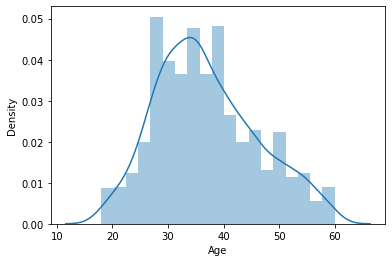

In [17]:
#plt.hist(df['Age'])
sns.distplot(df['Age'])

In [18]:
#Age group of ibm employees is 25-45
